# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
tf. __version__

'2.12.0'

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [4]:
import os
import random


### Set all the Constants

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [8]:
base_dir = "./PlantVillage"

In [9]:
print(os.listdir(base_dir))

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


In [10]:
folder1 = "Potato___Early_blight"
folder2 = "Potato___healthy"
folder3 = "Potato___Late_blight"

In [11]:
folder1_path = os.path.join(base_dir, folder1)
folder2_path = os.path.join(base_dir, folder2)
folder3_path = os.path.join(base_dir, folder3)

In [12]:
folder1_count = len(os.listdir(folder1_path))
folder2_count = len(os.listdir(folder2_path))
folder3_count = len(os.listdir(folder3_path))

min_count = min(folder1_count, folder2_count, folder3_count)

if min_count == folder1_count:
    min_folder = folder1_path
elif min_count == folder2_count:
    min_folder = folder2_path
else:
    min_folder = folder3_path

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
image_files = os.listdir(min_folder)
print(image_files)

['00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG', '03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG', '04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG', '046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG', '07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG', '0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG', '0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG', '0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG', '1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG', '111cd9d8-4d27-4225-be9e-d29b21cf56b9___RS_HL 5419.JPG', '142fb983-2166-4a0f-b99b-a6c21e99987e___RS_HL 5398.JPG', '14484ea5-9c34-427c-abe4-2743265aced0___RS_HL 4204.JPG', '144d2475-21ab-4bdc-a67c-9672a9b711e6___RS_HL 5376.JPG', '163ada72-4288-4f85-a3c1-feed23c8d1de___RS_HL 1940.JPG', '170f1f57-0fd4-421f-9c82-3b1804be63ad___RS_HL 1771.JPG', '1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG', '1ae826e2-5148-47bd-a44c-711ec9cc9c75___RS_HL 1954.JPG', '1b434c52-7be4-40c4-90d5-13220

In [15]:

for image_file in image_files:
    image_path = os.path.join(min_folder, image_file)
    image = tf.keras.preprocessing.image.load_img(image_path)
    x = tf.keras.preprocessing.image.img_to_array(image)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, 
                              save_to_dir=min_folder, 
                              save_prefix=image_file.split(".")[0], save_format='jpg'):
        i += 1
        if i >= 5:
            break  


In [13]:
folder1_count = len(os.listdir(folder1_path))
folder2_count = len(os.listdir(folder2_path))
folder3_count = len(os.listdir(folder3_path))
print(folder1_count)
print(folder2_count)
print(folder3_count)

1000
912
1000


In [21]:
# for image_file in image_files:
#     image_path = os.path.join(min_folder, image_file)
#     image = tf.keras.preprocessing.image.load_img(image_path)
#     print(image)
#     x = tf.keras.preprocessing.image.img_to_array(image)
#     print("***",image)
#     x = x.reshape((1,) + x.shape)

### Import data into tensorflow dataset object

In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2912 files belonging to 3 classes.


In [15]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 2 2 0 2 2 1 0 0 0 1 1 0 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 1 1 0]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels 

### Visualize some of the images from our dataset

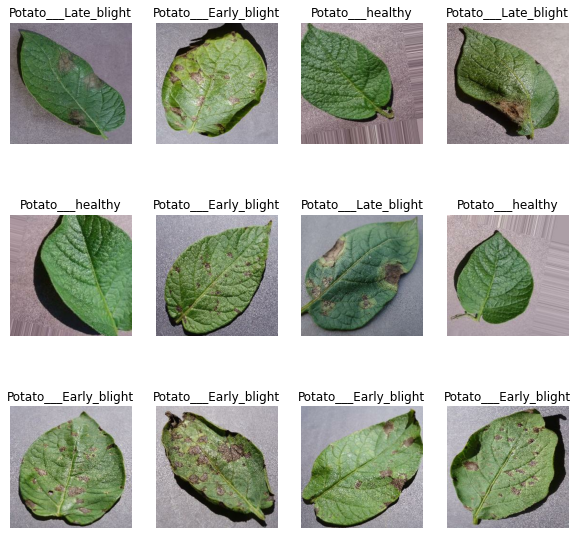

In [17]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [18]:
len(dataset)

91

In [19]:
train_size = 0.8
len(dataset)*train_size

72.8

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

72

In [23]:
len(val_ds)

9

In [24]:
len(test_ds)

10

### Cache, Shuffle, and Prefetch the Dataset

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [27]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [29]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

#### Applying Data Augmentation to Train Dataset

In [30]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)          0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
72/72 [==============================] - 273s 3s/step - loss: 0.9345 - accuracy: 0.5043 - val_loss: 0.6536 - val_accuracy: 0.6806
Epoch 2/50
72/72 [==============================] - 198s 3s/step - loss: 0.5711 - accuracy: 0.7574 - val_loss: 0.4561 - val_accuracy: 0.7812
Epoch 3/50
72/72 [==============================] - 195s 3s/step - loss: 0.3743 - accuracy: 0.8511 - val_loss: 0.2124 - val_accuracy: 0.9062
Epoch 4/50
72/72 [==============================] - 179s 2s/step - loss: 0.2319 - accuracy: 0.9115 - val_loss: 0.1635 - val_accuracy: 0.9410
Epoch 5/50
72/72 [==============================] - 184s 3s/step - loss: 0.1891 - accuracy: 0.9310 - val_loss: 0.2574 - val_accuracy: 0.9028
Epoch 6/50
72/72 [==============================] - 200s 3s/step - loss: 0.2100 - accuracy: 0.9223 - val_loss: 0.1740 - val_accuracy: 0.9236
Epoch 7/50
72/72 [==============================] - 201s 3s/step - loss: 0.1741 - accuracy: 0.9366 - val_loss: 0.3205 - val_accuracy: 0.8854
Epoch 8/50
72

KeyboardInterrupt: 

In [35]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 28s 487ms/step - loss: 0.0473 - accuracy: 0.9781


**You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [36]:
scores

[0.047345418483018875, 0.9781249761581421]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [37]:
history

import tensorflow as tf
tf. __version__
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import random
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
folder1_count = len(os.listdir(folder1_path))
folder2_count = len(os.listdir(folder2_path))
folder3_count = len(os.listdir(folder3_path))
print(folder1_count)
print(folder2_count)
print(folder3_count)
print(os.listdir(base_dir))
base_dir = "./PlantVillage"
print(os.listdir(base_dir))
folder1 = "Potato___Early_blight"
folder2 = "Potato___healthy"
folder3 = "Potato___Late_blight"
folder1_path = os.path.join(base_dir, folder1)
folder2_path = os.path.join(base_dir, folder2)
folder3_path = os.path.join(base_dir, folder3)
folder1_count = len(os.listdir(folder1_path))
folder2_count = len(os.listdir(folder2_path))
folder3_count = len(os.listdir(folder3_path))

min_count = min(folder1_count, folder2_co

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8801848292350769,
 0.6033139228820801,
 0.3646925389766693,
 0.2776017189025879,
 0.24480397999286652]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

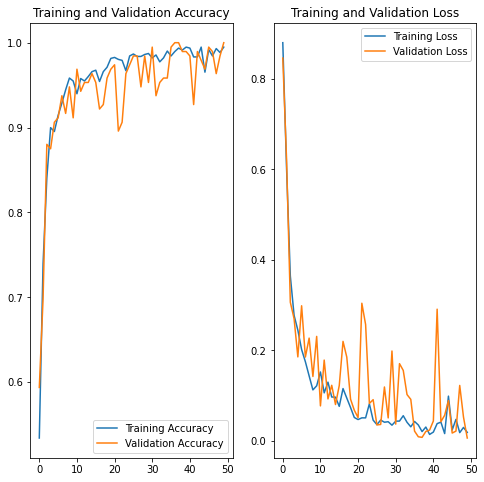

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Late_blight


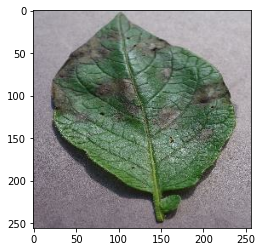

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 61ms/step


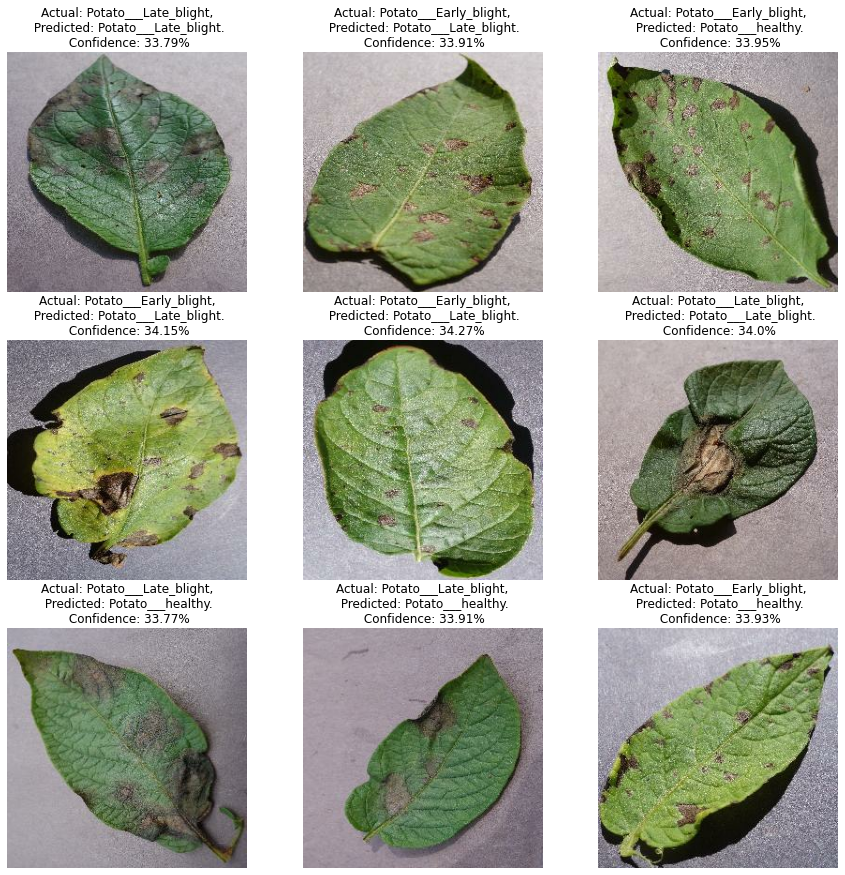

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Saving the Model
We append the model to the list of models as a new version

In [ ]:

model.save(f"../saved_models/1")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [ ]:
model.save("../potatoes.h5")